# importando bibliotecas 

In [191]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

# importando DataFrame


fonte: https://www.football-data.co.uk/

In [26]:
!wget https://www.football-data.co.uk/new/BRA.csv

--2022-02-02 15:13:17--  https://www.football-data.co.uk/new/BRA.csv
Resolving www.football-data.co.uk (www.football-data.co.uk)... 217.160.0.246
Connecting to www.football-data.co.uk (www.football-data.co.uk)|217.160.0.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407903 (398K) [text/csv]
Saving to: ‘BRA.csv.1’

BRA.csv.1           100%[===================>] 398.34K   348KB/s    in 1.1s    

2022-02-02 15:13:19 (348 KB/s) - ‘BRA.csv.1’ saved [407903/407903]



In [27]:
df = pd.read_csv('BRA.csv', delimiter=',')

## Legenda



*   Country' = país
* 'League' = nome da liga
* 'Season'  = temporada
* 'Date' = data do jogo
* 'Time' = hora do jogo
* 'Home' = time da casa
* 'Away' = time visitante
* 'HG' = número de gols do time da casa
* 'AG' = número de gols do time visitante
* 'Res' = resultado do jogo (D=empate, H=casa vence, A=visitante vence)
* 'PH' = probabilidade de vitória do time da casa pela Pinacle (casa de apostas inglesa)
* 'PD' = probabilidade de empate pela Pinacle (casa de apostas inglesa)
* 'PA' = probabilidade de vitória do visitante pela Pinacle (casa de apostas inglesa)
* 'MaxH' =  probabilidade de vitória do time da casa pela OddsPortal (casa de apostas inglesa)
* 'MaxD' = probabilidade de empate pela OddsPortal (casa de apostas inglesa)
* 'MaxA' = probabilidade de vitória do time visitante pela OddsPortal (casa de apostas inglesa)
* 'AvgH' probabilidade média de vitória do time da casa pela OddsPortal (casa de apostas inglesa)
* 'AvgD' = probabilidade média de empate pela OddsPortal (casa de apostas inglesa)
* 'AvgA' = probabilidade média de vitória do time visitante pela OddsPortal (casa de apostas inglesa)



# Verificando DataFrame

In [39]:
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [40]:
df[-5:]

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
3795,Brazil,Serie A,2021,10/12/2021,00:30,Gremio,Atletico-MG,4.0,3.0,H,1.54,4.57,5.91,1.58,4.60,6.21,1.52,4.33,5.77
3796,Brazil,Serie A,2021,10/12/2021,00:30,Juventude,Corinthians,1.0,0.0,H,2.33,3.11,3.55,2.37,3.20,3.70,2.25,3.06,3.46
3797,Brazil,Serie A,2021,10/12/2021,00:30,Palmeiras,Ceara,1.0,0.0,H,4.21,3.84,1.86,4.23,3.95,1.95,4.00,3.73,1.85
3798,Brazil,Serie A,2021,10/12/2021,00:30,Santos,Cuiaba,1.0,1.0,D,2.11,3.04,4.33,2.14,3.24,4.45,2.07,3.01,4.09
3799,Brazil,Serie A,2021,10/12/2021,00:30,Sport Recife,Athletico-PR,1.0,1.0,D,1.75,3.64,5.28,1.75,3.76,5.60,1.71,3.57,5.19


In [41]:
df['Season'].dtype

dtype('int64')

In [43]:
df.columns

Index(['Country', 'League', 'Season', 'Date', 'Time', 'Home', 'Away', 'HG',
       'AG', 'Res', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD',
       'AvgA'],
      dtype='object')

In [44]:
df.shape

(3800, 19)

# apagando colunas desnecessárias

In [45]:
np.unique(df['Country'])

array(['Brazil'], dtype=object)

In [46]:
df = df.drop('Country', axis = 1)

In [47]:
df.head()

,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [48]:
np.unique(df['League'])

array(['Serie A'], dtype=object)

In [49]:
df = df.drop('League', axis = 1)

In [50]:
df = df.drop('Time', axis = 1)

In [51]:
df.columns

Index(['Season', 'Date', 'Home', 'Away', 'HG', 'AG', 'Res', 'PH', 'PD', 'PA',
       'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA'],
      dtype='object')

In [52]:
df.head()

,Season,Date,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,2012,19/05/2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2012,19/05/2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2012,20/05/2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,2012,20/05/2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,2012,20/05/2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


# verificando valores nulos

In [53]:
df.isnull().sum()

Season    0
Date      0
Home      0
Away      0
HG        1
AG        1
Res       1
PH        1
PD        1
PA        1
MaxH      0
MaxD      0
MaxA      0
AvgH      0
AvgD      0
AvgA      0
dtype: int64

# apagando valores nulos

Como são poucos os registros nulos, então não há problemas em apagá-los

In [54]:
df = df.dropna(axis=0)

In [55]:
df.isnull().sum()

Season    0
Date      0
Home      0
Away      0
HG        0
AG        0
Res       0
PH        0
PD        0
PA        0
MaxH      0
MaxD      0
MaxA      0
AvgH      0
AvgD      0
AvgA      0
dtype: int64

In [56]:
df.shape

(3799, 16)

* Observamos que apenas 1 registro estava com valores nulos

# Divisão entre treinamento e teste

Para a separação, optamos por utilizar para treinamento os dados anteriores à 2020 e os dados de teste para os anos de 2020 e 2021.

## Verificando a quantidade de registros entre 2020 e 2021

In [57]:
df.loc[df['Season'] > 2019]

,Season,Date,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
3040,2020,08/08/2020,Fortaleza,Athletico-PR,0.0,2.0,A,2.04,3.38,3.85,2.09,3.48,4.20,2.02,3.25,3.77
3041,2020,08/08/2020,Coritiba,Internacional,0.0,1.0,A,3.85,3.13,2.14,4.15,3.25,2.26,3.77,3.06,2.11
3042,2020,09/08/2020,Sport Recife,Ceara,3.0,2.0,H,2.94,3.02,2.67,3.13,3.17,2.77,2.91,2.93,2.61
3043,2020,09/08/2020,Flamengo RJ,Atletico-MG,0.0,1.0,A,1.46,4.84,6.35,1.52,4.85,7.40,1.47,4.46,6.27
3044,2020,09/08/2020,Santos,Bragantino,1.0,1.0,D,2.17,3.31,3.53,2.23,3.98,3.60,2.15,3.25,3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2021,10/12/2021,Gremio,Atletico-MG,4.0,3.0,H,1.54,4.57,5.91,1.58,4.60,6.21,1.52,4.33,5.77
3796,2021,10/12/2021,Juventude,Corinthians,1.0,0.0,H,2.33,3.11,3.55,2.37,3.20,3.70,2.25,3.06,3.46
3797,2021,10/12/2021,Palmeiras,Ceara,1.0,0.0,H,4.21,3.84,1.86,4.23,3.95,1.95,4.00,3.73,1.85
3798,2021,10/12/2021,Santos,Cuiaba,1.0,1.0,D,2.11,3.04,4.33,2.14,3.24,4.45,2.07,3.01,4.09


Observamos que ao separarmos os anos de 2020 e 2021, obtemos pouco mais que 20% dos dados (760/3799)*100, portanto 80 % dos dados será utilizado como treinamento e 20 % para o teste.

# Convertendo a coluna 'resultado' para numérico

In [60]:
df = df.drop('Date', axis = 1)

In [69]:
df.head()

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [70]:
label_Res = LabelEncoder()

In [71]:
x_label_res = label_Res.fit_transform(df['Res'])

In [72]:
np.unique(x_label_res)

array([0, 1, 2])

In [73]:
df['Res'] = x_label_res

In [84]:
df.head()

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,2012,Palmeiras,Portuguesa,1.0,1.0,1,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,1,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2012,Figueirense,Nautico,2.0,1.0,2,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,2,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,2012,Corinthians,Fluminense,0.0,1.0,0,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


Legenda:

* '0' - vitória do time visitante
* '1' - empate
* '2' - vitória do time da casa

# Separando Treinamento e Teste

### Treinamento

Para o treinamento utilizaremos os anos inferiores à 2020

In [91]:
df_train = df.loc[df['Season'] <= 2019]

In [92]:
np.unique(df_train['Season'])

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [95]:
df_train.shape

(3039, 15)

In [96]:
df_train.head()

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,2012,Palmeiras,Portuguesa,1.0,1.0,1,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,1,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2012,Figueirense,Nautico,2.0,1.0,2,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,2,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,2012,Corinthians,Fluminense,0.0,1.0,0,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


### Teste

Para o teste utilizaremos os anos de 2020 e 2021

In [93]:
df_test = df.loc[df['Season']> 2019]

In [94]:
df_test.shape

(760, 15)

# Separando previsores de alvo

### Previsores

In [97]:
x_prev = df_train.iloc[:,6:15]

In [98]:
x_prev.columns

Index(['PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA'], dtype='object')

In [102]:
x_prev.shape

(3039, 9)

In [99]:
x_prev.head()

,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [100]:
x_targ = df_test.iloc[:,6:15]

In [103]:
x_targ.columns

Index(['PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA'], dtype='object')

In [101]:
x_targ.shape

(760, 9)

In [104]:
x_targ.head()

,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
3040,2.04,3.38,3.85,2.09,3.48,4.20,2.02,3.25,3.77
3041,3.85,3.13,2.14,4.15,3.25,2.26,3.77,3.06,2.11
3042,2.94,3.02,2.67,3.13,3.17,2.77,2.91,2.93,2.61
3043,1.46,4.84,6.35,1.52,4.85,7.40,1.47,4.46,6.27
3044,2.17,3.31,3.53,2.23,3.98,3.60,2.15,3.25,3.39


### Alvo

In [173]:
y_prev = df_train['Res']

In [174]:
y_prev.shape

(3039,)

In [106]:
y_targ = df_test['Res']

In [107]:
y_targ.shape

(760,)

# Escolhendo as melhores features com KBest

In [115]:
features_kbest = x_targ.columns.tolist()

In [116]:
features_kbest

['PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']

In [118]:
kbest_features = SelectKBest(k='all')

In [120]:
kbest_features.fit_transform(x_targ, y_targ)

array([[2.04, 3.38, 3.85, ..., 2.02, 3.25, 3.77],
       [3.85, 3.13, 2.14, ..., 3.77, 3.06, 2.11],
       [2.94, 3.02, 2.67, ..., 2.91, 2.93, 2.61],
       ...,
       [4.21, 3.84, 1.86, ..., 4.  , 3.73, 1.85],
       [2.11, 3.04, 4.33, ..., 2.07, 3.01, 4.09],
       [1.75, 3.64, 5.28, ..., 1.71, 3.57, 5.19]])

In [121]:
kbest_features_scores = kbest_features.scores_

In [122]:
kbest_features_scores

array([33.3009317 ,  7.15498901, 29.04424902, 33.21498652,  9.14108266,
       26.23743553, 33.98951074,  8.06784953, 29.0078    ])

# Tuning dos valores com GridSearch

In [131]:
x_GS = df.iloc[:,6:15]
y_GS = df['Res']

In [134]:
x_GS.shape

(3799, 9)

In [136]:
x_GS.head()

,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [135]:
y_GS.shape

(3799,)

### Árvore de Decisão

In [137]:
parametros = {'criterion': ['gini', 'entropy'], 
              'splitter': ['best', 'random'], 
              'min_samples_split': [2,5,10]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_GS, y_GS)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [138]:
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.41484189723320164


* Árvore de decisão:

    * melhores parâmetros: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
    * resultado: 41,48 %

### KNN





In [142]:
parametros = {'n_neighbors': [3, 5, 10, 20],'p': [1, 2]}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_GS, y_GS)


melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)	

{'n_neighbors': 20, 'p': 2}
0.4909142916579987


* Árvore de decisão:

    * melhores parâmetros: {'n_neighbors': 20, 'p': 2}
    * resultado: 49,09 %

### Regressão Logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.0000001],
				'C': [1.0, 1.5, 2.0],
				'solver': ['lbfgs', 'sag', 'saga']}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_GS, y_GS)

In [145]:
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'solver': 'saga', 'tol': 0.0001}
0.516979405034325


* Regressão Logística

    * melhores parâmetros: {'C': 1.5, 'solver': 'saga', 'tol': 0.0001}
    * resultado: 51,69 %

### Random Forest

In [167]:
parametros = {'criterion': ['gini', 'entropy'], 
              'n_estimators': [80, 100, 120], 
              'min_samples_split': [5, 10, 15]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_GS, y_GS)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [80, 100, 120]})

In [168]:
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_split': 15, 'n_estimators': 120}
0.48854448373899173


* Random Forest

    * melhores parâmetros: {'criterion': 'gini', 'min_samples_split': 15, 'n_estimators': 120}
    * resultado: 48,85 %

### Análise dos resultados

* Árvore de decisão: 

    * resultado: 41,48 %

* KNN: 

    * resultado: 49,09 %

* Regressão Logística: 

    * resultado: 51,69 %

* Random Forest: 

    * resultado: 48,85 %

Portando o melhor resultado: 51,69 % acontece em regressão logística com os parâmetros {'C': 1.5, 'solver': 'saga', 'tol': 0.0001}

# Realizando o treinamento e teste no algoritmo de melhor resultado

In [184]:
log_regres_bras = LogisticRegression(C= 1.5, solver= 'saga', tol= 0.0001, random_state=0)

In [185]:
log_regres_bras.fit(x_prev, y_prev)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=1.5, random_state=0, solver='saga')

In [186]:
log_regres_bras.intercept_

array([-0.40479798,  0.10390783,  0.30089015])

In [187]:
log_regres_bras.coef_

array([[ 0.33552903,  0.11229992,  0.31223169, -0.13458415,  0.07620732,
        -0.09614486,  0.00414927, -0.11253511, -0.38612423],
       [-0.18068756, -0.14149885, -0.13406387,  0.17886064, -0.05261825,
         0.006443  ,  0.10818096, -0.02293449,  0.21126983],
       [-0.15484147,  0.02919894, -0.17816782, -0.04427648, -0.02358906,
         0.08970185, -0.11233023,  0.1354696 ,  0.1748544 ]])

In [188]:
previsoes = log_regres_bras.predict(x_targ)

In [189]:
accuracy_score(y_targ, previsoes)

0.49736842105263157

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0.49736842105263157

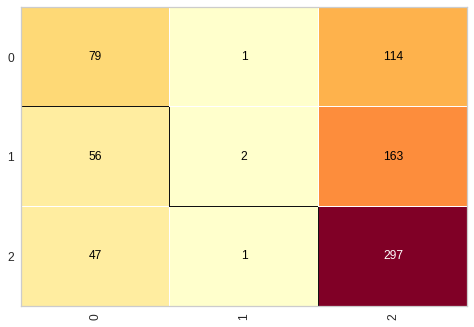

In [192]:
cm = ConfusionMatrix(log_regres_bras)
cm.fit(x_prev, y_prev)
cm.score(x_targ, y_targ)

In [194]:
print(classification_report(y_targ, previsoes))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42       194
           1       0.50      0.01      0.02       221
           2       0.52      0.86      0.65       345

    accuracy                           0.50       760
   macro avg       0.48      0.43      0.36       760
weighted avg       0.49      0.50      0.41       760



# Conclusões

Observamos que o melhor algoritmo tem 86 % de chance de identificar uma vitória em casa, porém com uma precisão de apenas 52 %, então, não é aconselhável o uso desse algoritmo para previsao de jogos do campeonato brasileiro.